### Analytical Signal
formula of SP for a pole 
\begin{equation}
    SP = \frac{K}{\sqrt{(x-x_{0})^2+(2z)^2}}
\end{equation}
`Analytical Signal` is given by
\begin{equation}
    AS = \sqrt{(\frac{d}{dx}SP)^2+(\frac{d}{dz}SP)^2}
\end{equation}
So, `Analytical Signal` comes out to be
\begin{equation}
    AS = \frac{K}{(x-x_{0})^2+(z)^2}
\end{equation}


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def AnalyticalSignal(X, Xo, h):
    anSig = 50/((X-Xo)**2+h**2)
    return anSig


In [3]:
x = np.arange(-150, 150)
Xo = 35
h = 20
signalo = np.empty((300, 1))
for i in range(0, 300):
    signalo[i, 0] = (AnalyticalSignal(x[i], Xo, h))


In [4]:
def Error(k):
    error = np.sqrt(np.sum(np.square(k-signalo), axis=0)*(1/300))
    return error


1. Error = 0.04036020973485147
	x = 28.36813681379138, h = 48.184895079555815

2. Error = 0.028159761782697895
	x = 37.056521151497506, h = 31.683609457436997

3. Error = 0.013985728330296713
	x = 32.59174332069115, h = 24.719151391071122

4. Error = 0.008495419876067485
	x = 32.70775626592689, h = 20.457514442794057

5. Error = 0.0037288652716541367
	x = 32.70775626592689, h = 20.250845182163875

6. Error = 0.0037288652716541367
	x = 33.1011487648085, h = 20.230178256100857

7. Error = 0.0027847118624140213
	x = 34.52230773868088, h = 20.058889235703095

Total no. of iterations were 7
Original parameters were
	x = 35, h = 20
Final parameters are
	x = 34.73563517950153, h = 20.058889235703095
Final Error is 0.0008110834754568041


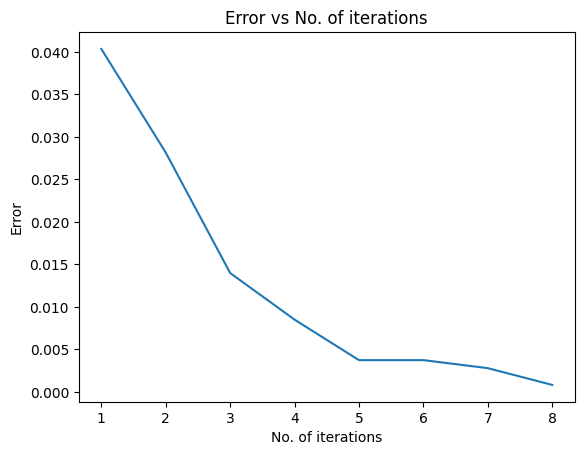

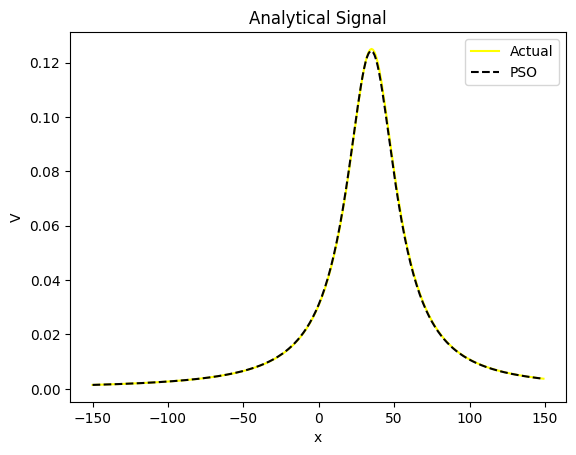

In [5]:
noOfRuns = 0
while (1):
    noOfIterations = np.array([])
    errorG = np.array([])
    noOfRuns = noOfRuns+1
    position = np.empty((2, 20))
    for k in range(0, 20):
        position[0, k] = -150 + np.random.random()*300
        position[1, k] = (5+np.random.random()*45)
    l_best = position
    signal = np.empty((300, 20))
    L = np.empty((300, 20))
    G = np.empty((300, 1))
    U = 2*position-1
    c = 0
    g = 500*np.ones((2, 1))

    # pso
    while (1):
        c = c+1
        # finding updating signal
        for k in range(0, 20):
            for i in range(0, 300):
                signal[i, k] = AnalyticalSignal(
                    x[i], position[0, k], position[1, k])
                L[i, k] = AnalyticalSignal(
                    x[i], l_best[0, k], l_best[1, k])
        for i in range(0, 300):
            G[i, 0] = AnalyticalSignal(x[i], g[0, 0], g[1, 0])

        # updating l best
        for i in range(0, 20):
            if (Error(signal)[i] <= Error(L)[i]):
                for k in range(0, 2):
                    l_best[k][i] = position[k][i]

        # finding g best
        if (np.min(Error(signal)) <= Error(G)):
            for i in range(0, 2):
                g[i][0] = position[i][np.argmin(Error(signal))]

        # updating parameters
        for j in range(0, 20):
            for i in range(0, 2):
                U[i][j] = 0.1*U[i][j] - 2*np.random.random()*(position[i][j] -
                                                              l_best[i][j]) - 2*np.random.random()*(position[i][j] - g[i][0])

        position = position + U

        # checking range
        for i in range(0, 20):
            if (position[0][i] < -150):
                position[0][i] = -150
            if (position[0][i] > 150):
                position[0][i] = 150
            if (position[1][i] < 5):
                position[1][i] = 5
            if (position[1][i] > 50):
                position[1][i] = 50
        noOfIterations = np.append(noOfIterations, c)
        errorG = np.append(errorG, Error(G))
        if (Error(G) < 0.001):
            break
        else:
            print(c, end='. ')
            print(
                f"Error = {float(Error(G))}\n\tx = {g[0][0]}, h = {position[1][0]}\n")
    if (c):
        break
# print('PSO was', rerun, 'times')
print('Total no. of iterations were', (noOfRuns-1)*400+c-1)
print(
    f'Original parameters were\n\tx = {Xo}, h = {h}')
print(
    f'Final parameters are\n\tx = {g[0][0]}, h = {g[1][0]}')
print('Final Error is', float(Error(G)))

plt.plot(noOfIterations, errorG)
plt.xlabel('No. of iterations')
plt.ylabel('Error')
plt.title('Error vs No. of iterations')
plt.savefig('Error.png', dpi=300)
plt.show()
signalans = np.empty((300, 1))
for i in range(0, 300):
    signalans[i, 0] = (AnalyticalSignal(x[i], g[0][0], g[1][0]))
plt.plot(x, signalo, label='Actual', color='yellow')
plt.plot(x, signalans, label='PSO', color='black', linestyle='dashed')
plt.title('Analytical Signal')
plt.xlabel('x')
plt.ylabel('V')
plt.legend()
plt.savefig('AnalyticalSignal.png', dpi=300)
plt.show()
